['#ID', 'continuity:dsfr1_16', 'continuity:dsfr1_50', 'continuity:dsfr1_84', 'continuity:dsfr2_16', 'continuity:dsfr2_50', 'continuity:dsfr2_84', 'continuity:dsfr3_16', 'continuity:dsfr3_50', 'continuity:dsfr3_84', 'continuity:dsfr4_16', 'continuity:dsfr4_50', 'continuity:dsfr4_84', 'continuity:dsfr5_16', 'continuity:dsfr5_50', 'continuity:dsfr5_84', 'continuity:massformed_16', 'continuity:massformed_50', 'continuity:massformed_84', 'continuity:metallicity_16', 'continuity:metallicity_50', 'continuity:metallicity_84', 'dust:Av_16', 'dust:Av_50', 'dust:Av_84', 'nebular:logU_16', 'nebular:logU_50', 'nebular:logU_84', 'redshift_16', 'redshift_50', 'redshift_84', 'stellar_mass_16', 'stellar_mass_50', 'stellar_mass_84', 'formed_mass_16', 'formed_mass_50', 'formed_mass_84', 'sfr_16', 'sfr_50', 'sfr_84', 'ssfr_16', 'ssfr_50', 'ssfr_84', 'nsfr_16', 'nsfr_50', 'nsfr_84', 'sfr_10myr_16', 'sfr_10myr_50', 'sfr_10myr_84', 'ssfr_10myr_16', 'ssfr_10myr_50', 'ssfr_10myr_84', 'nsfr_10myr_16', 'nsfr_10m

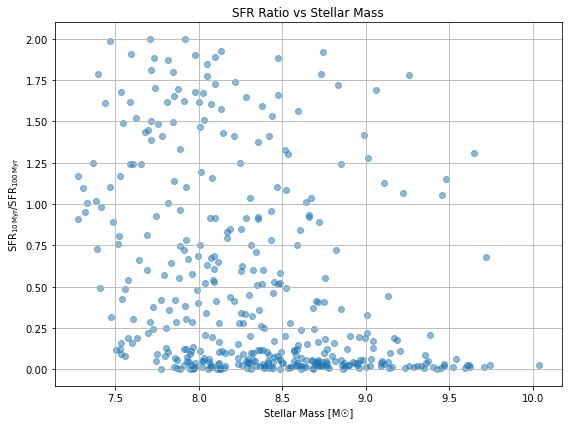

In [22]:
#messing around with the bagpipes output of the JADES catalogue
#deducing correlations between star formation rate ratios and other properties

from astropy.io import fits
from astropy.table import Table
from astropy.table import join
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Load the file
hdulist = fits.open("JADES-DR3-GS_MASTER_Sel-F277W+F356W+F444W_v13.fits")
table_bagpipes = Table(hdulist[1].data)
hdulist.close()
print(table_bagpipes.colnames)

# Extract current star formation rate (median value)
sfr = table_bagpipes['sfr_50']

# # --- Plot 2: SFR vs Stellar Mass ---
# stellar_mass = table_bagpipes['stellar_mass_50']

# plt.figure(figsize=(8, 6))
# plt.scatter(stellar_mass, sfr, s=10, alpha=0.7, color='royalblue')
# plt.xlabel("Stellar Mass (M$_\odot$)")
# plt.ylabel("Current SFR (M$_\odot$/yr)")
# plt.title("Current SFR vs Stellar Mass")
# plt.xscale('log')
# plt.yscale('log')
# plt.grid(True, which='both', linestyle='--', alpha=0.6)
# plt.tight_layout()
# #plt.show()

#------------ SFR ratios -------------------
# Extract the SFRs
sfr_10myr = table_bagpipes['sfr_10myr_50']
sfr_100myr = table_bagpipes['sfr_50']

# Avoid division by zero
valid = sfr_100myr > 0

# Compute ratio
sfr_ratio = np.full_like(sfr_10myr, np.nan)  # Fill with NaNs by default
sfr_ratio[valid] = sfr_10myr[valid] / sfr_100myr[valid]
table_bagpipes["sfr_ratio"] = sfr_ratio[valid]
mask = (sfr_ratio < 2) & np.isfinite(sfr_ratio)



# # --- Plot: Histogram of SFR(10 Myr) / SFR(100 Myr) ---
# plt.figure(figsize=(8, 5))
# plt.hist(sfr_ratio[~np.isnan(sfr_ratio)], bins=30, color='tomato', edgecolor='black')
# plt.xlabel("SFR$_{10\,\mathrm{Myr}}$ / SFR$_{100\,\mathrm{Myr}}$")
# plt.ylabel("Number of Galaxies")
# plt.title("Ratio of Recent to Average SFR")
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.tight_layout()
# #plt.show()

plt.figure(figsize=(8,6))  # create a new figure, optional but good for clarity
plt.scatter(table_bagpipes["stellar_mass_50"][mask], sfr_ratio[mask], alpha=0.5)
plt.xlabel("Stellar Mass [M☉]")
plt.ylabel(r"SFR$_{10\,\mathrm{Myr}}$/SFR$_{100\,\mathrm{Myr}}$")
plt.title("SFR Ratio vs Stellar Mass")
plt.grid(True)
plt.tight_layout()  # fits labels better
plt.show()


In [5]:
#messing around with the bagpipes output of the JADES catalogue
#deducing correlations between star formation rate ratios and other properties

from astropy.io import fits
from astropy.table import Table
from astropy.table import join
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Load the file
field = 'CEERS'
file = 'CEERS_MASTER_Sel-F277W+F356W+F444W_v9.fits'
hdulist = fits.open("/raid/scratch/work/parkera/ACS_WFC+NIRCam/v11/COSMOS-Web-0A/COSMOS-Web-0A_MASTER_Sel-F444W_v11_0.32as_EAZY_fsps_larson_zmax=6.0.fits")
table_bagpipes = Table(hdulist[1].data)
hdulist.close()
print(table_bagpipes.colnames)

['IDENT', 'zbest_fsps_larson_zmax=6.0', 'zbest_16_fsps_larson_zmax=6.0', 'zbest_84_fsps_larson_zmax=6.0', 'chi2_best_fsps_larson_zmax=6.0', 'U_rf_flux_fsps_larson_zmax=6.0', 'U_rf_flux_err_fsps_larson_zmax=6.0', 'B_rf_flux_fsps_larson_zmax=6.0', 'B_rf_flux_err_fsps_larson_zmax=6.0', 'V_rf_flux_fsps_larson_zmax=6.0', 'V_rf_flux_err_fsps_larson_zmax=6.0', 'J_rf_flux_fsps_larson_zmax=6.0', 'J_rf_flux_err_fsps_larson_zmax=6.0']


['#ID', 'dust:Av_16', 'dust:Av_50', 'dust:Av_84', 'exponential:age_16', 'exponential:age_50', 'exponential:age_84', 'exponential:massformed_16', 'exponential:massformed_50', 'exponential:massformed_84', 'exponential:metallicity_16', 'exponential:metallicity_50', 'exponential:metallicity_84', 'exponential:tau_16', 'exponential:tau_50', 'exponential:tau_84', 'redshift_16', 'redshift_50', 'redshift_84', 'stellar_mass_16', 'stellar_mass_50', 'stellar_mass_84', 'formed_mass_16', 'formed_mass_50', 'formed_mass_84', 'sfr_16', 'sfr_50', 'sfr_84', 'ssfr_16', 'ssfr_50', 'ssfr_84', 'nsfr_16', 'nsfr_50', 'nsfr_84', 'sfr_10myr_16', 'sfr_10myr_50', 'sfr_10myr_84', 'ssfr_10myr_16', 'ssfr_10myr_50', 'ssfr_10myr_84', 'nsfr_10myr_16', 'nsfr_10myr_50', 'nsfr_10myr_84', 'burstiness_16', 'burstiness_50', 'burstiness_84', 'mass_weighted_age_16', 'mass_weighted_age_50', 'mass_weighted_age_84', 'tform_16', 'tform_50', 'tform_84', 'tquench_16', 'tquench_50', 'tquench_84', 'mass_weighted_zmet_16', 'mass_weighte

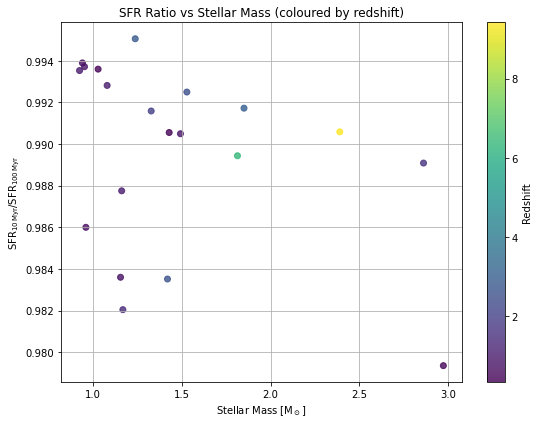

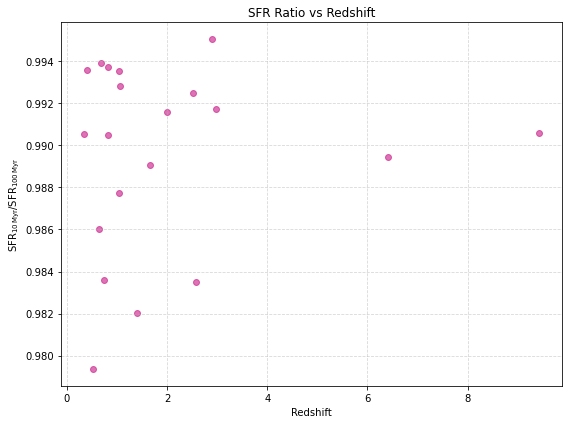

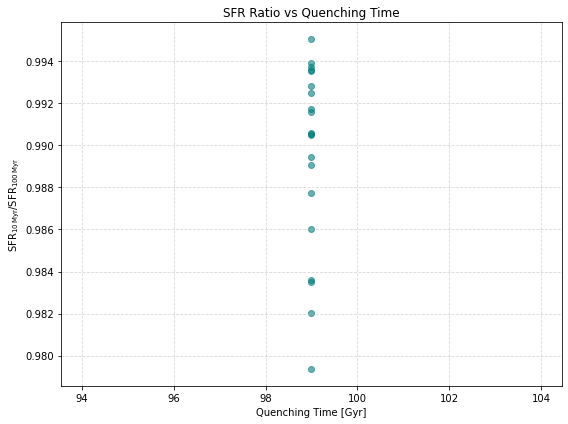

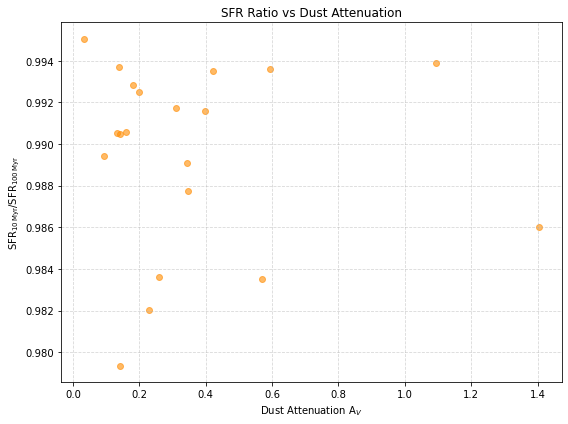

In [11]:
#messing around with the bagpipes output of the JADES catalogue
#deducing correlations between star formation rate ratios and other properties
#trying on my mini cat!

from astropy.io import fits
from astropy.table import Table
from astropy.table import join
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Load the file
table_bagpipes = Table.read("pipes/cats/mini_cat_20.fits")

hdulist.close()
print(table_bagpipes.colnames)

# Extract current star formation rate (median value)
sfr = table_bagpipes['sfr_50']

# --- Plot 2: SFR vs Stellar Mass ---
stellar_mass = table_bagpipes['stellar_mass_50']

# plt.figure(figsize=(8, 6))
# plt.scatter(stellar_mass, sfr, s=10, alpha=0.7, color='royalblue')
# plt.xlabel("Stellar Mass (M$_\odot$)")
# plt.ylabel("Current SFR (M$_\odot$/yr)")
# plt.title("Current SFR vs Stellar Mass")
# plt.xscale('log')
# plt.yscale('log')
# plt.grid(True, which='both', linestyle='--', alpha=0.6)
# plt.tight_layout()
# #plt.show()

#------------ SFR ratios -------------------
# Extract the SFRs
sfr_10myr = table_bagpipes['sfr_10myr_50']
sfr_100myr = table_bagpipes['sfr_50']

# Avoid division by zero
valid = sfr_100myr > 0

# Compute ratio
sfr_ratio = np.full_like(sfr_10myr, np.nan)  # Fill with NaNs by default
sfr_ratio[valid] = sfr_10myr[valid] / sfr_100myr[valid]
table_bagpipes["sfr_ratio"] = sfr_ratio[valid]
redshift = table_bagpipes['redshift_50']


# # --- Plot: Histogram of SFR(10 Myr) / SFR(100 Myr) ---
# plt.figure(figsize=(8, 5))
# plt.hist(sfr_ratio[~np.isnan(sfr_ratio)], bins=30, color='tomato', edgecolor='black')
# plt.xlabel("SFR$_{10\,\mathrm{Myr}}$ / SFR$_{100\,\mathrm{Myr}}$")
# plt.ylabel("Number of Galaxies")
# plt.title("Ratio of Recent to Average SFR")
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.tight_layout()
# #plt.show()

plt.figure(figsize=(8, 6))

# Scatter plot with redshift colour coding
sc = plt.scatter(table_bagpipes["stellar_mass_50"], sfr_ratio, 
                 c=redshift, cmap='viridis', alpha=0.8)

# Axis labels and title
plt.xlabel("Stellar Mass [M$_\odot$]")
plt.ylabel(r"SFR$_{10\,\mathrm{Myr}}$/SFR$_{100\,\mathrm{Myr}}$")
plt.title("SFR Ratio vs Stellar Mass (coloured by redshift)")

# Grid and layout
plt.grid(True)
plt.tight_layout()

# Add colourbar
cbar = plt.colorbar(sc)
cbar.set_label("Redshift")

# Show the plot
plt.show()

## --- Plot: SFR Ratio vs Redshift ---
plt.figure(figsize=(8,6))
plt.scatter(table_bagpipes["redshift_50"], sfr_ratio, alpha=0.6, c="mediumvioletred")
plt.xlabel("Redshift")
plt.ylabel(r"SFR$_{10\,\mathrm{Myr}}$/SFR$_{100\,\mathrm{Myr}}$")
plt.title("SFR Ratio vs Redshift")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#§# --- Plot: SFR Ratio vs Quenching Time ---
plt.figure(figsize=(8,6))
plt.scatter(table_bagpipes["tquench_50"], sfr_ratio, alpha=0.6, c="teal")
plt.xlabel("Quenching Time [Gyr]")
plt.ylabel(r"SFR$_{10\,\mathrm{Myr}}$/SFR$_{100\,\mathrm{Myr}}$")
plt.title("SFR Ratio vs Quenching Time")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Plot: SFR Ratio vs Dust Attenuation ---
plt.figure(figsize=(8,6))
plt.scatter(table_bagpipes["dust:Av_50"], sfr_ratio, alpha=0.6, c="darkorange")
plt.xlabel("Dust Attenuation A$_V$")
plt.ylabel(r"SFR$_{10\,\mathrm{Myr}}$/SFR$_{100\,\mathrm{Myr}}$")
plt.title("SFR Ratio vs Dust Attenuation")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


